# Part 3: Data Transformations
In the lectures, we discussed a number of data transformation techniques and how they can be employed to transform a dataset. Data transformations enable us to transform data in ways that would make them suitable for the kinds of the analysis we aim to accomplish and enable us to mitigate the effects of particular irregularities/characteristics in the data. In the following, we have a set of exercises that requires you to apply a data transformation and observe it effects on the data.
## DIY Exercises - 3 : Data Transformations
Here we test a couple of data distributions and observe how they change the data.
1. Download the csv data file from WHO on Tuberculosis (from Week01). Information on the data can be found on WHO's web page.

2.You may need to replace missing values before you start.

In [7]:
# Import pandas library
import pandas as pd
tb = pd.read_csv("TB_burden_countries_2014-09-29.csv")
tb.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
2958,Namibia,NaN,NAM,516,AFR,1990,1415447,751.0,358.0,1285.0,...,34.0,27.0,41.0,480.0,380.0,590.0,Surveillance,50.0,40.0,63.0
2959,Namibia,NaN,NAM,516,AFR,1991,1466152,670.0,321.0,1143.0,...,44.0,34.0,54.0,640.0,500.0,790.0,Surveillance,46.0,37.0,58.0
2960,Namibia,NaN,NAM,516,AFR,1992,1513689,613.0,292.0,1051.0,...,57.0,45.0,71.0,870.0,690.0,1100.0,Surveillance,31.0,25.0,39.0
2961,Namibia,NaN,NAM,516,AFR,1993,1559480,619.0,288.0,1076.0,...,80.0,63.0,98.0,1200.0,990.0,1500.0,Surveillance,85.0,69.0,110.0
2962,Namibia,NaN,NAM,516,AFR,1994,1605828,659.0,298.0,1159.0,...,113.0,90.0,139.0,1800.0,1400.0,2200.0,Surveillance,NaN,NaN,NaN


In [4]:
# Columns' missing data count
tb.isna().sum()

KeyError: 'Country'

In [15]:
# Before cleaning, we need to look at null values for non-numerical columns, as nulls should not be replaced by 
# numerical values
# Show rows where column iso2 is null OR column source_tbhiv is null
tb.loc[tb['iso2'].isna(), ['country', 'iso2', 'iso3']] # Seems to be a Namibiam problem, let's look at Namibia only...

,country,iso2,iso3
2958,Namibia,NaN,NAM
2959,Namibia,NaN,NAM
2960,Namibia,NaN,NAM
2961,Namibia,NaN,NAM
2962,Namibia,NaN,NAM
2963,Namibia,NaN,NAM
2964,Namibia,NaN,NAM
2965,Namibia,NaN,NAM
2966,Namibia,NaN,NAM
2967,Namibia,NaN,NAM


In [16]:
tb.loc[tb['country'] == 'Namibia', ['country', 'iso2', 'iso3']]
## yes is Namibian issue, no iso2 code so leave as is, should not impact our figures

,country,iso2,iso3
2958,Namibia,NaN,NAM
2959,Namibia,NaN,NAM
2960,Namibia,NaN,NAM
2961,Namibia,NaN,NAM
2962,Namibia,NaN,NAM
2963,Namibia,NaN,NAM
2964,Namibia,NaN,NAM
2965,Namibia,NaN,NAM
2966,Namibia,NaN,NAM
2967,Namibia,NaN,NAM


In [18]:
# source_tbhiv null value next, do we need to clean? Seems to be a Tajikistan problem - 4247 	Tajikistan 	TJ 	TJK 	NaN
tb.loc[tb['source_tbhiv'].isna(), ['country', 'iso2', 'iso3', 'source_tbhiv']]
# Ok, to make life easy, we substitute nulls by zeroes and forget about the means


,country,iso2,iso3,source_tbhiv
4247,Tajikistan,TJ,TJK,NaN


In [15]:
# fill missing data with 0
tb_zeroes = tb.fillna(0)
tb_mean = tb.fillna(tb.mean())

In [5]:
# Integrity counts
tb_zeroes.isna().sum()

country                     0
iso2                        0
iso3                        0
iso_numeric                 0
g_whoregion                 0
year                        0
e_pop_num                   0
e_prev_100k                 0
e_prev_100k_lo              0
e_prev_100k_hi              0
e_prev_num                  0
e_prev_num_lo               0
e_prev_num_hi               0
e_mort_exc_tbhiv_100k       0
e_mort_exc_tbhiv_100k_lo    0
e_mort_exc_tbhiv_100k_hi    0
e_mort_exc_tbhiv_num        0
e_mort_exc_tbhiv_num_lo     0
e_mort_exc_tbhiv_num_hi     0
source_mort                 0
e_inc_100k                  0
e_inc_100k_lo               0
e_inc_100k_hi               0
e_inc_num                   0
e_inc_num_lo                0
e_inc_num_hi                0
e_tbhiv_prct                0
e_tbhiv_prct_lo             0
e_tbhiv_prct_hi             0
e_inc_tbhiv_100k            0
e_inc_tbhiv_100k_lo         0
e_inc_tbhiv_100k_hi         0
e_inc_tbhiv_num             0
e_inc_tbhi

In [6]:
tb_mean.isna().sum()

country                      0
iso2                        23
iso3                         0
iso_numeric                  0
g_whoregion                  0
year                         0
e_pop_num                    0
e_prev_100k                  0
e_prev_100k_lo               0
e_prev_100k_hi               0
e_prev_num                   0
e_prev_num_lo                0
e_prev_num_hi                0
e_mort_exc_tbhiv_100k        0
e_mort_exc_tbhiv_100k_lo     0
e_mort_exc_tbhiv_100k_hi     0
e_mort_exc_tbhiv_num         0
e_mort_exc_tbhiv_num_lo      0
e_mort_exc_tbhiv_num_hi      0
source_mort                  1
e_inc_100k                   0
e_inc_100k_lo                0
e_inc_100k_hi                0
e_inc_num                    0
e_inc_num_lo                 0
e_inc_num_hi                 0
e_tbhiv_prct                 0
e_tbhiv_prct_lo              0
e_tbhiv_prct_hi              0
e_inc_tbhiv_100k             0
e_inc_tbhiv_100k_lo          0
e_inc_tbhiv_100k_hi          0
e_inc_tb

3. Choose a number of columns with different shapes, for instance, "e_prev_100k_hi" is left skewed and visualise on an histogram

(array([3242.,  759.,  453.,  230.,   91.,   50.,   39.,   18.,   16.,
           5.]),
 array([   0. ,  356.5,  713. , 1069.5, 1426. , 1782.5, 2139. , 2495.5,
        2852. , 3208.5, 3565. ]),
 <a list of 10 Patch objects>)

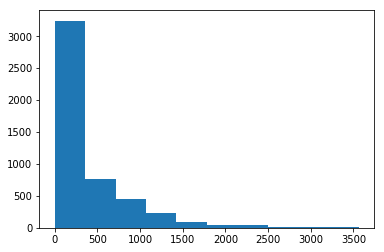

In [8]:
# choosing e_pop_num e_prev_num e_inc_num e_inc_tbhiv_num, NB e_prev_100k_hi is not mentioned in dictionary
import matplotlib.pyplot as plt
plt.hist([tb_zeroes['e_prev_100k_hi']])


(array([4733.,  109.,   15.,    0.,    0.,    0.,    6.,    8.,   15.,
          17.]),
 array([1.12900000e+03, 1.37707507e+08, 2.75413885e+08, 4.13120262e+08,
        5.50826640e+08, 6.88533018e+08, 8.26239396e+08, 9.63945774e+08,
        1.10165215e+09, 1.23935853e+09, 1.37706491e+09]),
 <a list of 10 Patch objects>)

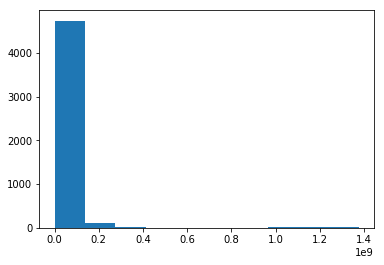

In [9]:
# choosing e_pop_num e_prev_num e_inc_num e_inc_tbhiv_num, NB e_prev_100k_hi is not mentioned in dictionary
import matplotlib.pyplot as plt
plt.hist([tb_zeroes['e_pop_num']])

(array([4.766e+03, 8.200e+01, 9.000e+00, 8.000e+00, 6.000e+00, 9.000e+00,
        3.000e+00, 2.000e+00, 5.000e+00, 1.300e+01]),
 array([      0.,  460000.,  920000., 1380000., 1840000., 2300000.,
        2760000., 3220000., 3680000., 4140000., 4600000.]),
 <a list of 10 Patch objects>)

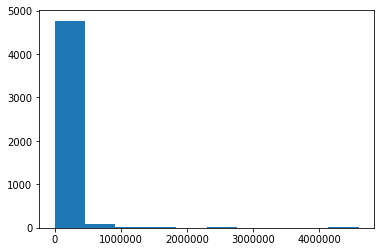

In [10]:
# choosing e_pop_num e_prev_num e_inc_num e_inc_tbhiv_num, NB e_prev_100k_hi is not mentioned in dictionary
import matplotlib.pyplot as plt
plt.hist([tb_zeroes['e_prev_num']])

4. Apply a log transformation on the data. Numpy has a log function. and visualise. Observe the changes

(array([4.766e+03, 8.200e+01, 9.000e+00, 8.000e+00, 6.000e+00, 9.000e+00,
        3.000e+00, 2.000e+00, 5.000e+00, 1.300e+01]),
 array([      0.,  460000.,  920000., 1380000., 1840000., 2300000.,
        2760000., 3220000., 3680000., 4140000., 4600000.]),
 <a list of 10 Patch objects>)

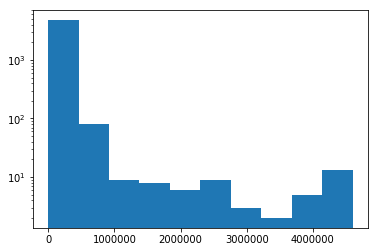

In [19]:
# NB using pyplot hist log argument
plt.hist(tb_zeroes['e_prev_num'], log=True)